<a href="https://colab.research.google.com/github/rohitmpy/new-_repo/blob/main/Gold_Price_Predictor_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import tensorflow as tf
from keras import Model
from keras.layers import Input, Dense, Dropout
from keras.layers import LSTM

as we see our data is not in right form. First we prepare our data and then we do some featur enginnering on it and make it well prepare for feeding in our ml model

In [ ]:
df=pd.read_csv("/content/output.csv")

In [ ]:
df

,"date,open,high,low,close,adj_close,volume"
0,"2004-11-18,44.380001068115234,44.3800010681152..."
1,"2004-11-19,44.779998779296875,44.7799987792968..."
2,"2004-11-22,44.95000076293945,44.95000076293945..."
3,"2004-11-23,44.75,44.75,44.91999816894531,44.72..."
4,"2004-11-24,45.04999923706055,45.04999923706055..."
...,...
5210,"2025-08-06,310.5,310.5,311.239990234375,309.83..."
5211,"2025-08-07,313.1199951171875,313.1199951171875..."
5212,"2025-08-08,313.04998779296875,313.049987792968..."
5213,"2025-08-11,308.54998779296875,308.549987792968..."


In [ ]:
df = df['date,open,high,low,close,adj_close,volume'].str.split(',', expand=True)


In [ ]:
df

,0,1,2,3,4,5,6
0,2004-11-18,44.380001068115234,44.380001068115234,44.4900016784668,44.06999969482422,44.43000030517578,5992000
1,2004-11-19,44.779998779296875,44.779998779296875,44.91999816894531,44.470001220703125,44.4900016784668,11655300
2,2004-11-22,44.95000076293945,44.95000076293945,44.970001220703125,44.7400016784668,44.75,11996000
3,2004-11-23,44.75,44.75,44.91999816894531,44.720001220703125,44.880001068115234,3169200
4,2004-11-24,45.04999923706055,45.04999923706055,45.04999923706055,44.790000915527344,44.93000030517578,6105100
...,...,...,...,...,...,...,...
5210,2025-08-06,310.5,310.5,311.239990234375,309.8399963378906,310.32000732421875,7418200
5211,2025-08-07,313.1199951171875,313.1199951171875,313.1400146484375,310.70001220703125,311.7200012207031,10891500
5212,2025-08-08,313.04998779296875,313.04998779296875,313.5299987792969,311.0,312.3500061035156,19886800
5213,2025-08-11,308.54998779296875,308.54998779296875,309.6600036621094,307.6300048828125,308.6199951171875,10326700


In [ ]:
df.columns = ['date', 'open', 'high', 'low', 'close', 'adj_close', 'volume']


In [ ]:
df.head()

,date,open,high,low,close,adj_close,volume
0,2004-11-18,44.380001068115234,44.380001068115234,44.4900016784668,44.06999969482422,44.43000030517578,5992000
1,2004-11-19,44.779998779296875,44.779998779296875,44.91999816894531,44.470001220703125,44.4900016784668,11655300
2,2004-11-22,44.95000076293945,44.95000076293945,44.970001220703125,44.7400016784668,44.75,11996000
3,2004-11-23,44.75,44.75,44.91999816894531,44.720001220703125,44.880001068115234,3169200
4,2004-11-24,45.04999923706055,45.04999923706055,45.04999923706055,44.790000915527344,44.93000030517578,6105100


In [ ]:
df.corr()

,date,open,high,low,close,adj_close,volume
date,1.000000,0.828081,0.828081,0.827253,0.829560,0.828154,-0.052602
open,0.828081,1.000000,1.000000,0.999911,0.999920,0.999823,0.127672
high,0.828081,1.000000,1.000000,0.999911,0.999920,0.999823,0.127672
low,0.827253,0.999911,0.999911,1.000000,0.999864,0.999919,0.133594
close,0.829560,0.999920,0.999920,0.999864,1.000000,0.999894,0.122853
adj_close,0.828154,0.999823,0.999823,0.999919,0.999894,1.000000,0.129357
volume,-0.052602,0.127672,0.127672,0.133594,0.122853,0.129357,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5215 entries, 0 to 5214
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       5215 non-null   object
 1   open       5215 non-null   object
 2   high       5215 non-null   object
 3   low        5215 non-null   object
 4   close      5215 non-null   object
 5   adj_close  5215 non-null   object
 6   volume     5215 non-null   object
dtypes: object(7)
memory usage: 285.3+ KB


In [ ]:
df.describe()

,date,open,high,low,close,adj_close,volume
count,5215,5215,5215,5215,5215,5215,5215
unique,5215,4235,4235,4230,4220,4238,5127
top,2025-08-12,42.689998626708984,42.689998626708984,121.70999908447266,120.7699966430664,119.0,9258600
freq,1,5,5,6,6,5,3


In [ ]:
df['date'] = pd.to_datetime(df['date'])
df.sort_values(by='date', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
NumCols = df.columns.drop(['date'])
df[NumCols] = df[NumCols].replace({',': ''}, regex=True)
df[NumCols] = df[NumCols].astype('float64')

In [ ]:
df.head()

,date,open,high,low,close,adj_close,volume
0,2004-11-18,44.380001,44.380001,44.490002,44.070000,44.430000,5992000.0
1,2004-11-19,44.779999,44.779999,44.919998,44.470001,44.490002,11655300.0
2,2004-11-22,44.950001,44.950001,44.970001,44.740002,44.750000,11996000.0
3,2004-11-23,44.750000,44.750000,44.919998,44.720001,44.880001,3169200.0
4,2004-11-24,45.049999,45.049999,45.049999,44.790001,44.930000,6105100.0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum().sum()

np.int64(0)

In [ ]:
fig = px.line(y=df.open, x=df.close)
fig.update_traces(line_color='black')
fig.update_layout(xaxis_title="close",
                  yaxis_title="open",
                  title={'text': "Gold Price History Data", 'y':0.95, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
                  plot_bgcolor='rgba(255,223,0,0.8)')

In [ ]:
fig = px.line(y=df.close, x=df.date)
fig.update_traces(line_color='black')
fig.update_layout(xaxis_title="date",
                  yaxis_title="Scaled Price",
                  title={'text': "Gold Price History Data", 'y':0.95, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
                  plot_bgcolor='rgba(255,223,0,0.8)')

In [ ]:
test_size = df[df.date.dt.year==2022].shape[0]
test_size

251

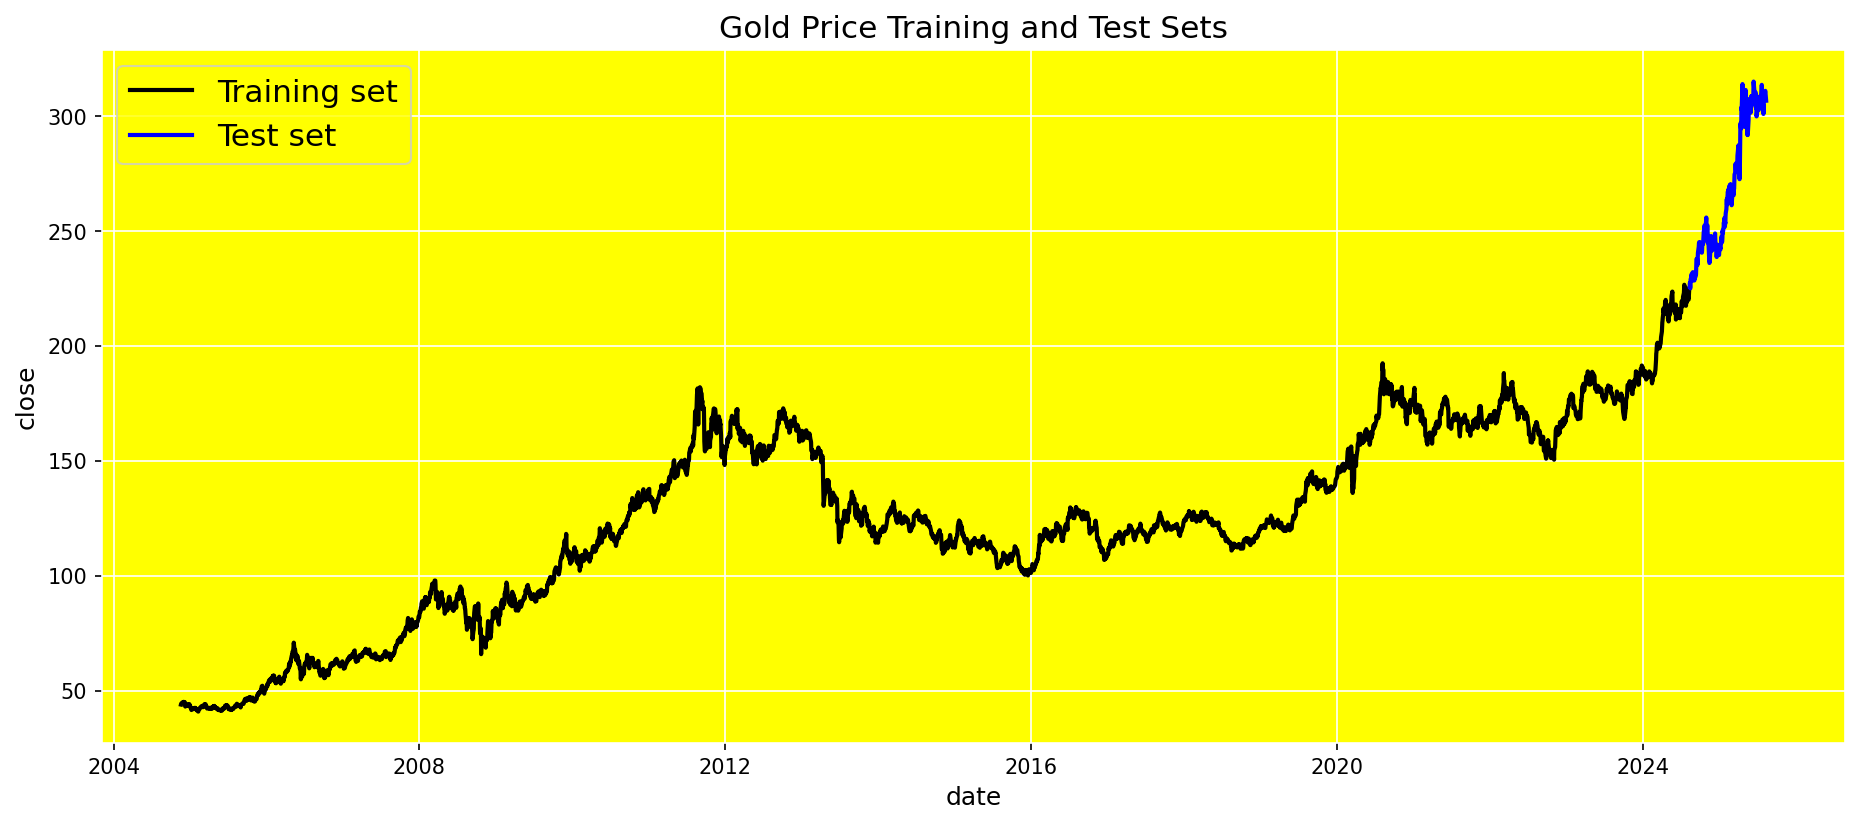

In [ ]:
plt.figure(figsize=(15, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'yellow'
plt.rc('axes',edgecolor='white')
plt.plot(df.date[:-test_size], df.close[:-test_size], color='black', lw=2)
plt.plot(df.date[-test_size:], df.close[-test_size:], color='blue', lw=2)
plt.title('Gold Price Training and Test Sets', fontsize=15)
plt.xlabel('date', fontsize=12)
plt.ylabel('close', fontsize=12)
plt.legend(['Training set', 'Test set'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

In [ ]:
scaler = MinMaxScaler()
scaler.fit(df.open.values.reshape(-1,1))

MinMaxScaler()

In [ ]:
window_size = 60

In [ ]:
train_data = df.close[:-test_size]
train_data = scaler.transform(train_data.values.reshape(-1,1))

In [ ]:
X_train = []
y_train = []

for i in range(window_size, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [ ]:
test_data = df.close[-test_size-60:]
test_data = scaler.transform(test_data.values.reshape(-1,1))

In [ ]:
X_test = []
y_test = []

for i in range(window_size, len(test_data)):
    X_test.append(test_data[i-60:i, 0])
    y_test.append(test_data[i, 0])

In [ ]:
X_train = np.array(X_train)
X_test  = np.array(X_test)
y_train = np.array(y_train)
y_test  = np.array(y_test)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test  = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_train = np.reshape(y_train, (-1,1))
y_test  = np.reshape(y_test, (-1,1))

In [ ]:
print('X_train Shape: ', X_train.shape)
print('y_train Shape: ', y_train.shape)
print('X_test Shape:  ', X_test.shape)
print('y_test Shape:  ', y_test.shape)

X_train Shape:  (4904, 60, 1)
y_train Shape:  (4904, 1)
X_test Shape:   (251, 60, 1)
y_test Shape:   (251, 1)


In [ ]:
def define_model():
    input1 = Input(shape=(window_size,1))
    x = LSTM(units = 64, return_sequences=True)(input1)
    x = Dropout(0.2)(x)
    x = LSTM(units = 64, return_sequences=True)(x)
    x = Dropout(0.2)(x)
    x = LSTM(units = 64)(x)
    x = Dropout(0.2)(x)
    x = Dense(32, activation='softmax')(x)
    dnn_output = Dense(1)(x)

    model = Model(inputs=input1, outputs=[dnn_output])
    model.compile(loss='mean_squared_error', optimizer='Nadam')
    model.summary()
    return model

In [ ]:
model = define_model()
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.1, verbose=1)

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 60, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 85,057 (332.25 KB)

 Trainable params: 85,057 (332.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
138/138 ━━━━━━━━━━━━━━━━━━━━ 21s 108ms/step - loss: 0.0303 - val_loss: 0.0082
Epoch 2/150
138/138 ━━━━━━━━━━━━━━━━━━━━ 15s 111ms/step - loss: 6.2715e-04 - val_loss: 0.0072
Epoch 3/150
138/138 ━━━━━━━━━━━━━━━━━━━━ 14s 103ms/step - loss: 5.2501e-04 - val_loss: 0.0066
Epoch 4/150
138/138 ━━━━━━━━━━━━━━━━━━━━ 15s 111ms/step - loss: 4.5320e-04 - val_loss: 0.0063
Epoch 5/150
138/138 ━━━━━━━━━━━━━━━━━━━━ 14s 103ms/step - loss: 3.8428e-04 - val_loss: 0.0061
Epoch 6/150
138/138 ━━━━━━━━━━━━━━━━━━━━ 20s 103ms/step - loss: 3.8410e-04 - val_loss: 0.0056
Epoch 7/150
138/138 ━━━━━━━━━━━━━━━━━━━━ 14s 104ms/step - loss: 3.4469e-04 - val_loss: 0.0054
Epoch 8/150
138/138 ━━━━━━━━━━━━━━━━━━━━ 20s 103ms/step - loss: 3.3769e-04 - val_loss: 0.0061
Epoch 9/150
138/138 ━━━━━━━━━━━━━━━━━━━━ 14s 102ms/step - loss: 3.1388e-04 - val_loss: 0.0053
Epoch 10/150
138/138 ━━━━━━━━━━━━━━━━━━━━ 14s 102ms/step - loss: 2.7626e-04 - val_loss: 0.0050
Epoch 11/150
138/138 ━━━━━━━━━━━━━━━━━━━━ 14s 105ms/step - loss

In [ ]:
result = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0677
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step


In [ ]:
MAPE = mean_absolute_percentage_error(y_test, y_pred)
Accuracy = 1 - MAPE

In [ ]:
print("Test Loss:", result)
print("Test MAPE:", MAPE)
print("Test Accuracy:", Accuracy)

Test Loss: 0.10608376562595367
Test MAPE: 0.3629209572397007
Test Accuracy: 0.6370790427602993


In [ ]:
y_test_true = scaler.inverse_transform(y_test)
y_test_pred = scaler.inverse_transform(y_pred)

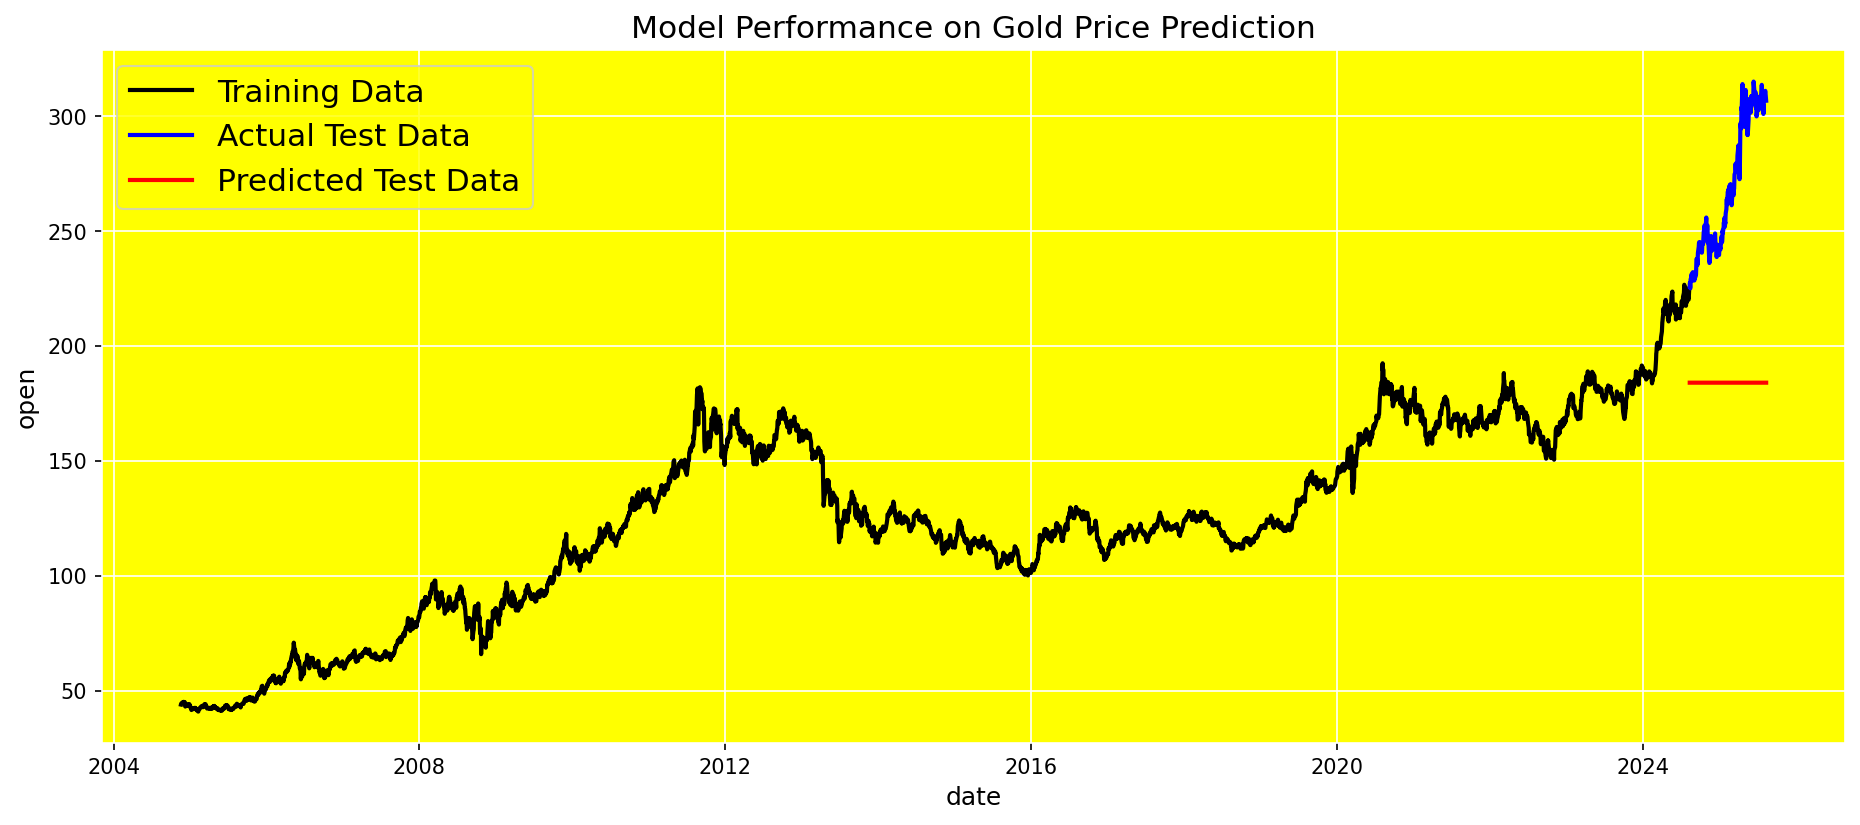

In [ ]:
plt.figure(figsize=(15, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'yellow'
plt.rc('axes',edgecolor='white')
plt.plot(df['date'].iloc[:-test_size], scaler.inverse_transform(train_data), color='black', lw=2)
plt.plot(df['date'].iloc[-test_size:], y_test_true, color='blue', lw=2)
plt.plot(df['date'].iloc[-test_size:], y_test_pred, color='red', lw=2)
plt.title('Model Performance on Gold Price Prediction', fontsize=15)
plt.xlabel('date', fontsize=12)
plt.ylabel('open', fontsize=12)
plt.legend(['Training Data', 'Actual Test Data', 'Predicted Test Data'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

# predicting the gold price with the actual price

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import tensorflow as tf
from keras import Model
from keras.layers import Input, Dense, Dropout
from keras.layers import LSTM

In [ ]:
df=pd.read_csv("/content/Gold Price (2013-2023).csv")

In [ ]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,12/30/2022,"1,826.20","1,821.80","1,832.40","1,819.80",107.50K,0.01%
1,12/29/2022,"1,826.00","1,812.30","1,827.30","1,811.20",105.99K,0.56%
2,12/28/2022,"1,815.80","1,822.40","1,822.80","1,804.20",118.08K,-0.40%
3,12/27/2022,"1,823.10","1,808.20","1,841.90","1,808.00",159.62K,0.74%
4,12/26/2022,"1,809.70","1,805.80","1,811.95","1,805.55",NaN,0.30%


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2583 entries, 0 to 2582
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      2583 non-null   object
 1   Price     2583 non-null   object
 2   Open      2583 non-null   object
 3   High      2583 non-null   object
 4   Low       2583 non-null   object
 5   Vol.      2578 non-null   object
 6   Change %  2583 non-null   object
dtypes: object(7)
memory usage: 141.4+ KB


## cleaning our data set

In [ ]:
df.drop(['Vol.', 'Change %'], axis=1, inplace=True)

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
NumCols = df.columns.drop(['Date'])
df[NumCols] = df[NumCols].replace({',': ''}, regex=True)
df[NumCols] = df[NumCols].astype('float64')

In [ ]:
df.head()

,Date,Price,Open,High,Low
0,2013-01-02,1689.9,1675.8,1695.0,1672.1
1,2013-01-03,1675.6,1688.0,1689.3,1664.3
2,2013-01-04,1649.9,1664.4,1664.4,1630.0
3,2013-01-07,1647.2,1657.3,1663.8,1645.3
4,2013-01-08,1663.2,1651.5,1662.6,1648.8


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum().sum()

np.int64(0)

In [ ]:
fig = px.line(y=df.Price, x=df.Date)
fig.update_traces(line_color='black')
fig.update_layout(xaxis_title="Date",
                  yaxis_title="Scaled Price",
                  title={'text': "Gold Price History Data", 'y':0.95, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
                  plot_bgcolor='rgba(255,223,0,0.8)')

In [ ]:
test_size = df[df.Date.dt.year==2022].shape[0]
test_size

260

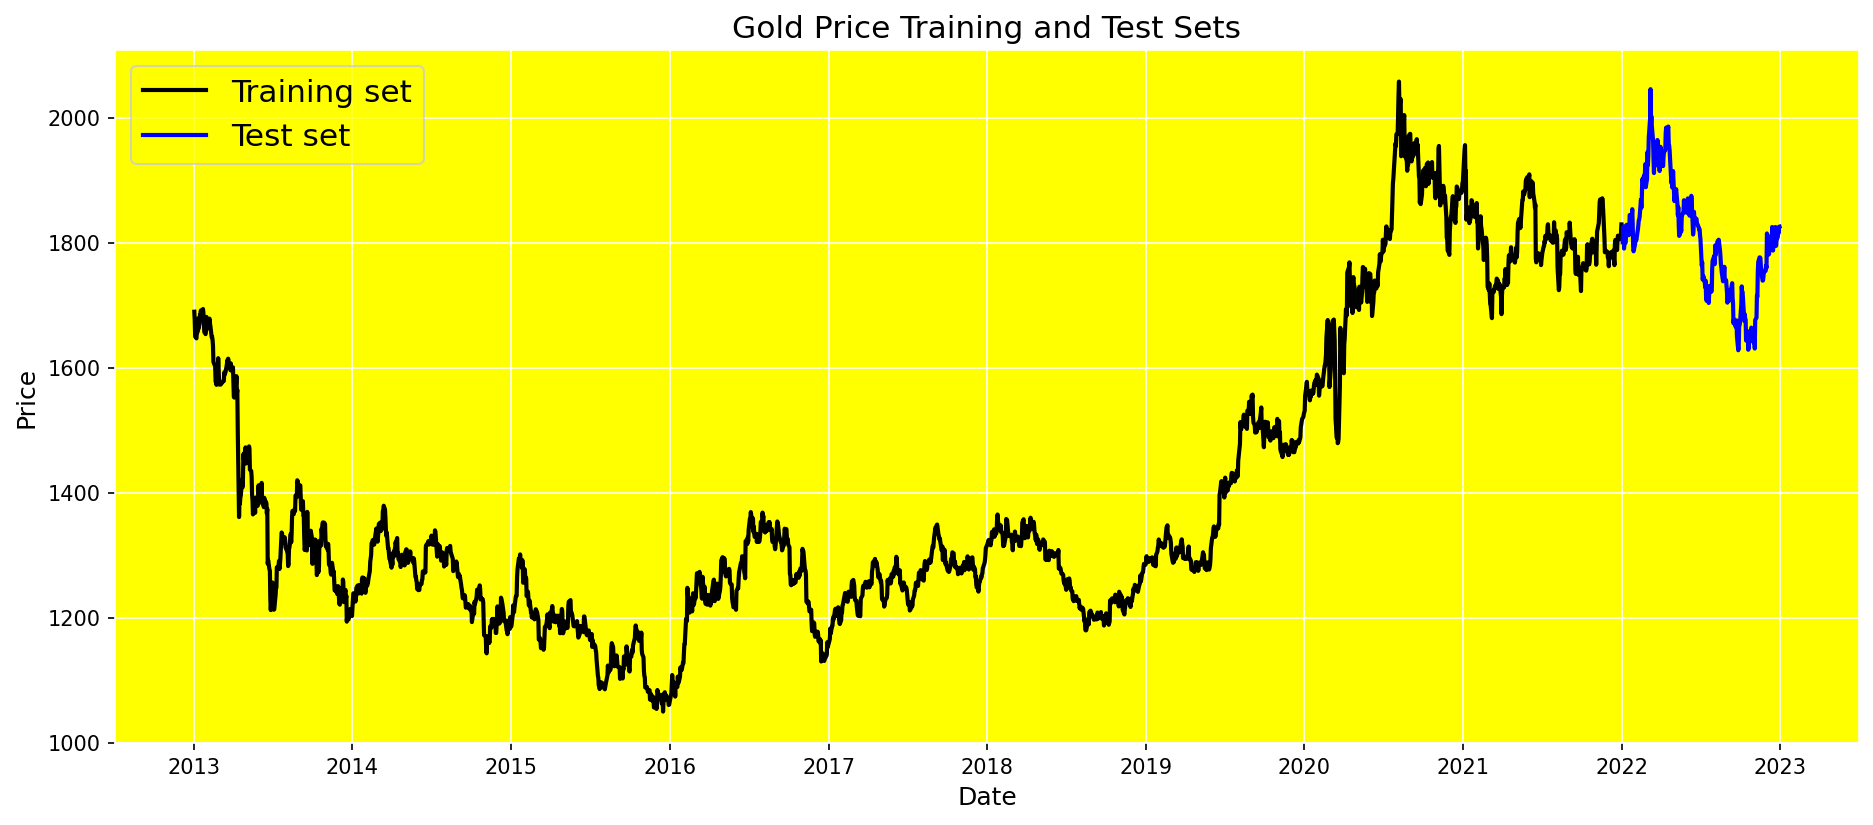

In [ ]:
plt.figure(figsize=(15, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'yellow'
plt.rc('axes',edgecolor='white')
plt.plot(df.Date[:-test_size], df.Price[:-test_size], color='black', lw=2)
plt.plot(df.Date[-test_size:], df.Price[-test_size:], color='blue', lw=2)
plt.title('Gold Price Training and Test Sets', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(['Training set', 'Test set'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

In [ ]:
scaler = MinMaxScaler()
scaler.fit(df.Price.values.reshape(-1,1))

MinMaxScaler()

In [ ]:
window_size = 60

In [ ]:
train_data = df.Price[:-test_size]
train_data = scaler.transform(train_data.values.reshape(-1,1))

In [ ]:
X_train = []
y_train = []

for i in range(window_size, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [ ]:
test_data = df.Price[-test_size-60:]
test_data = scaler.transform(test_data.values.reshape(-1,1))

In [ ]:
X_test = []
y_test = []

for i in range(window_size, len(test_data)):
    X_test.append(test_data[i-60:i, 0])
    y_test.append(test_data[i, 0])


In [ ]:
X_train = np.array(X_train)
X_test  = np.array(X_test)
y_train = np.array(y_train)
y_test  = np.array(y_test)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test  = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_train = np.reshape(y_train, (-1,1))
y_test  = np.reshape(y_test, (-1,1))

In [ ]:
print('X_train Shape: ', X_train.shape)
print('y_train Shape: ', y_train.shape)
print('X_test Shape:  ', X_test.shape)
print('y_test Shape:  ', y_test.shape)

X_train Shape:  (2263, 60, 1)
y_train Shape:  (2263, 1)
X_test Shape:   (260, 60, 1)
y_test Shape:   (260, 1)


In [ ]:
def define_model():
    input1 = Input(shape=(window_size,1))
    x = LSTM(units = 64, return_sequences=True)(input1)
    x = Dropout(0.2)(x)
    x = LSTM(units = 64, return_sequences=True)(x)
    x = Dropout(0.2)(x)
    x = LSTM(units = 64)(x)
    x = Dropout(0.2)(x)
    x = Dense(32, activation='softmax')(x)
    dnn_output = Dense(1)(x)

    model = Model(inputs=input1, outputs=[dnn_output])
    model.compile(loss='mean_squared_error', optimizer='Nadam')
    model.summary()

    return model

In [ ]:
model = define_model()
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.1, verbose=1)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 60, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 85,057 (332.25 KB)

 Trainable params: 85,057 (332.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
64/64 ━━━━━━━━━━━━━━━━━━━━ 14s 123ms/step - loss: 0.0690 - val_loss: 0.0664
Epoch 2/150
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - loss: 0.0108 - val_loss: 0.0312
Epoch 3/150
64/64 ━━━━━━━━━━━━━━━━━━━━ 7s 114ms/step - loss: 0.0061 - val_loss: 0.0141
Epoch 4/150
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - loss: 0.0054 - val_loss: 0.0051
Epoch 5/150
64/64 ━━━━━━━━━━━━━━━━━━━━ 8s 121ms/step - loss: 0.0032 - val_loss: 0.0024
Epoch 6/150
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - loss: 0.0024 - val_loss: 0.0024
Epoch 7/150
64/64 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - loss: 0.0019 - val_loss: 0.0032
Epoch 8/150
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - loss: 0.0018 - val_loss: 0.0029
Epoch 9/150
64/64 ━━━━━━━━━━━━━━━━━━━━ 11s 104ms/step - loss: 0.0016 - val_loss: 0.0059
Epoch 10/150
64/64 ━━━━━━━━━━━━━━━━━━━━ 7s 115ms/step - loss: 0.0013 - val_loss: 0.0083
Epoch 11/150
64/64 ━━━━━━━━━━━━━━━━━━━━ 10s 107ms/step - loss: 0.0011 - val_loss: 0.0045
Epoch 12/150
64/64 ━━━━━━━━━━━━━━━━━━━━ 7s

In [ ]:
result = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 8.5433e-04
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 211ms/step


In [ ]:
MAPE = mean_absolute_percentage_error(y_test, y_pred)
Accuracy = 1 - MAPE

In [ ]:
print("Test Loss:", result)
print("Test MAPE:", MAPE)
print("Test Accuracy:", Accuracy)

Test Loss: 0.0009285471751354635
Test MAPE: 0.03373193000828465
Test Accuracy: 0.9662680699917153


In [ ]:
y_test_true = scaler.inverse_transform(y_test)
y_test_pred = scaler.inverse_transform(y_pred)

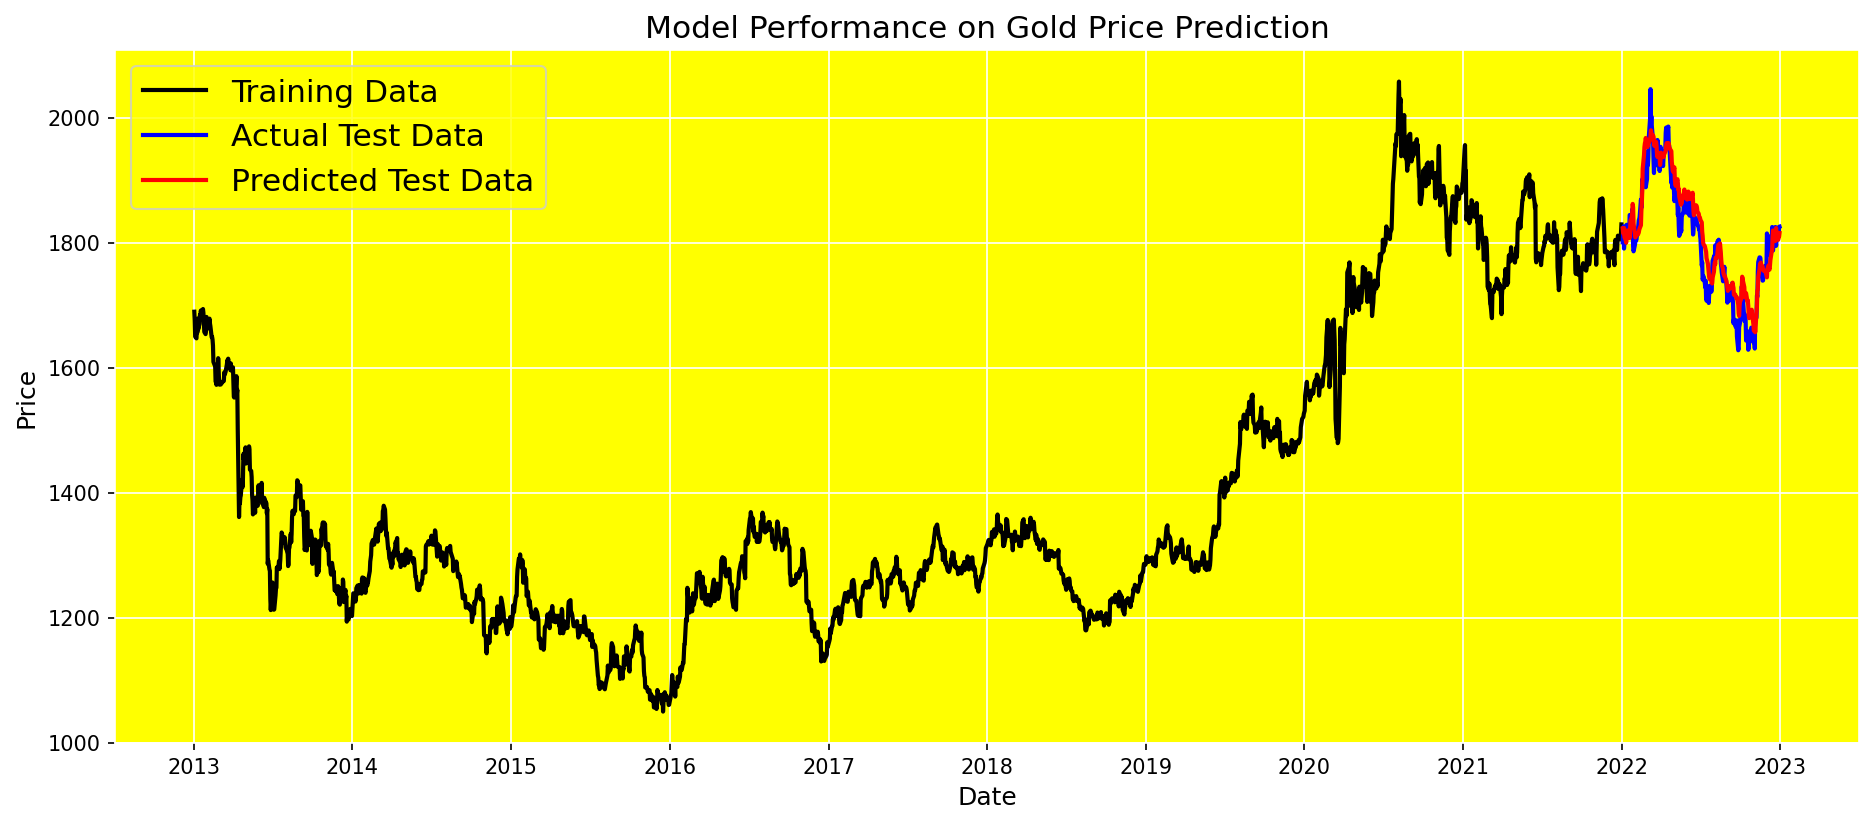

In [ ]:


plt.figure(figsize=(15, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'yellow'
plt.rc('axes',edgecolor='white')
plt.plot(df['Date'].iloc[:-test_size], scaler.inverse_transform(train_data), color='black', lw=2)
plt.plot(df['Date'].iloc[-test_size:], y_test_true, color='blue', lw=2)
plt.plot(df['Date'].iloc[-test_size:], y_test_pred, color='red', lw=2)
plt.title('Model Performance on Gold Price Prediction', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(['Training Data', 'Actual Test Data', 'Predicted Test Data'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()